**motivation**<br>
In this notebook we clarify two basic concepts behind a confidence interval: sampling distribution and margin of error.

In [1]:
# set up
# underlying normal distribution with unknown mean and known standard deviation
mean=75  # in practice this is unknown
sd=10

# draw a sample from this distribution
n=200
sample=rnorm(n,mean,sd)

# take the sample mean, use the sample mean as a point estimate of the population mean
mean(sample)

[1] 74.01437

In [2]:
# Repeated sampling to get the sampling distribution of the sample mean
M=10000
sm=numeric(0)
for (i in 1:M) {
  sample=rnorm(n,mean,sd)
  sm[i]=mean(sample)
}

mean(sm);  # empirical mean of the sample means
mean;  # theoretical mean of the sample means
sd(sm);  # empirical standard deviation of the sample means
sd/sqrt(n);  # theoretical standard deviation of the sample means

[1] 74.98643

[1] 75

[1] 0.7071719

[1] 0.7071068

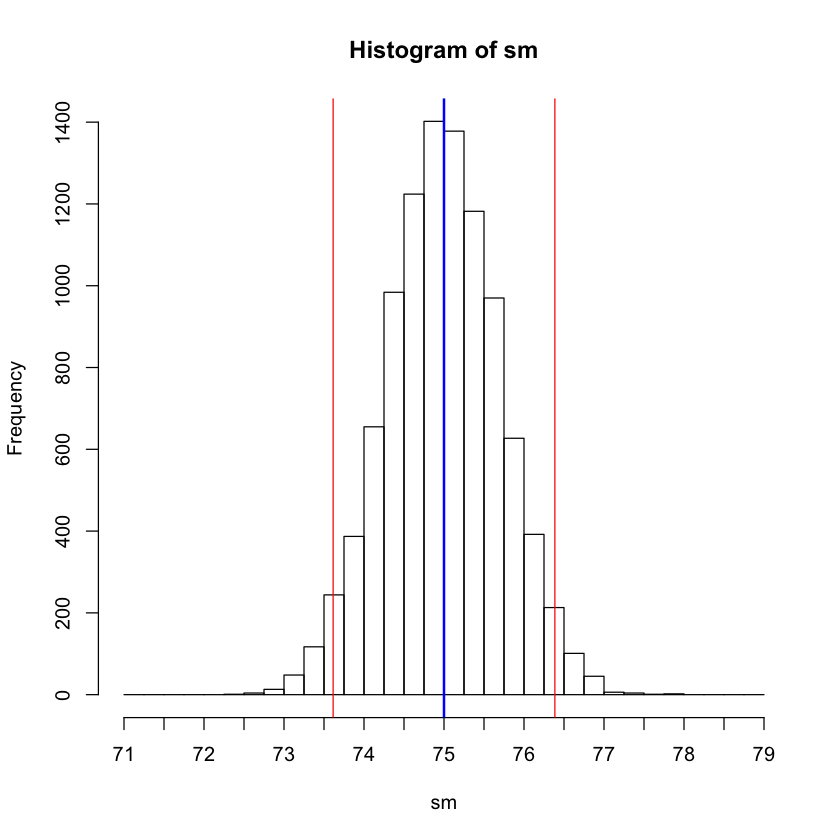

In [3]:
# Visualize the sampling distribution
hist(sm,breaks=seq(71,79,0.25),xaxt='n')
axis(side=1, at=seq(71,79,0.5), labels=seq(71,79,0.5))
abline(v=mean, col="blue",lwd=2)
abline(v=mean+qnorm(0.975)*(sd/sqrt(n)), col="red")
abline(v=mean-qnorm(0.975)*(sd/sqrt(n)), col="red")

**the idea of confidence interval**<br>
The sampling distribution of the sample means is normal N(mean, sd/sqrt(n)), where mean = 75 is the blue line. The red lines are defined to be (qnorm(0.975)(sd/sqrt(n))) away from the mean, so that a sample mean is contained between the red lines 95% of the times. The quantity (qnorm(0.975)(sd/sqrt(n))) is known as the margin of error. Now a sample mean is contained within the margin of error from the mean, if and only if the mean is contained within the margin of error from the sample mean (I'm close to you if and only if you are close to me). Therefore, if we span an interval around a sample mean, with the margin of error being the radius, we will be able to capture the mean 95% of the times. This is the idea of confidence interval.

In [4]:
# check that in the simulation 95% of the sample means are within the margin of error from the mean
sum(sm<mean+qnorm(0.975)*(sd/sqrt(n)) & sm>mean-qnorm(0.975)*(sd/sqrt(n)))/M

[1] 0.9474

In [5]:
# construct a confidence interval
n=200
sample=rnorm(n,mean,sd)
mean(sample)
mean(sample)-qnorm(0.975)*(sd/sqrt(n))
mean(sample)+qnorm(0.975)*(sd/sqrt(n))

[1] 75.59649

[1] 74.21059

[1] 76.98239

In [6]:
# 95% confidence interval will capture the true mean 95% of the times
M=10000
x=numeric(0)
xl=numeric(0)
xu=numeric(0)
capture=numeric(0)
for (i in 1:M) {
  sample=rnorm(n,mean,sd)
  x[i]=mean(sample)
  xl[i]=x[i]-qnorm(0.975)*(sd/sqrt(n))
  xu[i]=x[i]+qnorm(0.975)*(sd/sqrt(n))
  capture[i]=(mean>=xl[i] & mean<=xu[i])
}
sum(capture)/M

[1] 0.9515

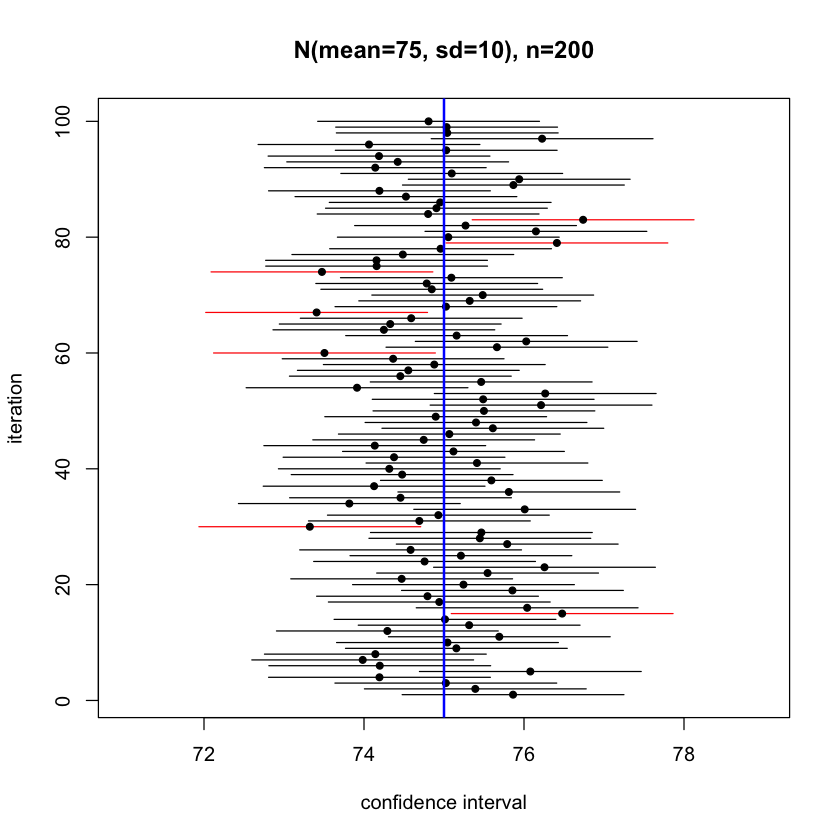

In [7]:
# visualize the above result
x.plot=c(71,79)
y.plot=c(1,100)
plot(x.plot,y.plot,col="white",xlab="confidence interval",ylab="iteration")
for (i in 1:100){
  if (xl[i]>mean | xu[i]<mean) {
    segments(xl[i],i,xu[i],i,col="red")  
  } else {
    segments(xl[i],i,xu[i],i,col="black")  
  }
  points(x[i],i,pch=19,cex=0.75)
}
abline(v=mean,col="blue",lwd=2)
title("N(mean=75, sd=10), n=200")